# Task 2: Credit Risk Prediction

## Objective
To predict whether a loan applicant is likely to default on a loan.
## DataSet
This dataset contains applicant information used to predict whether a loan will be approved or not.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

Loading Dataset

In [2]:
df = pd.read_csv("loan.csv")   # adjust name if different
df.head()

,Age,Income,Credit_Score,Loan_Amount,Loan_Term,Employment_Status,Loan_Approved
0,56,81788,334,15022,48,Employed,0
1,69,102879,781,21013,24,Self-Employed,1
2,46,58827,779,39687,60,Self-Employed,0
3,32,127188,364,16886,24,Unemployed,0
4,60,25655,307,26256,36,Unemployed,0


#### Check for missing values

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2000 non-null   int64 
 1   Income             2000 non-null   int64 
 2   Credit_Score       2000 non-null   int64 
 3   Loan_Amount        2000 non-null   int64 
 4   Loan_Term          2000 non-null   int64 
 5   Employment_Status  2000 non-null   object
 6   Loan_Approved      2000 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 109.5+ KB


The dataset was inspected using info(), which showed no missing values.
Therefore, no missing value treatment was required.

#### EDA (visualization)

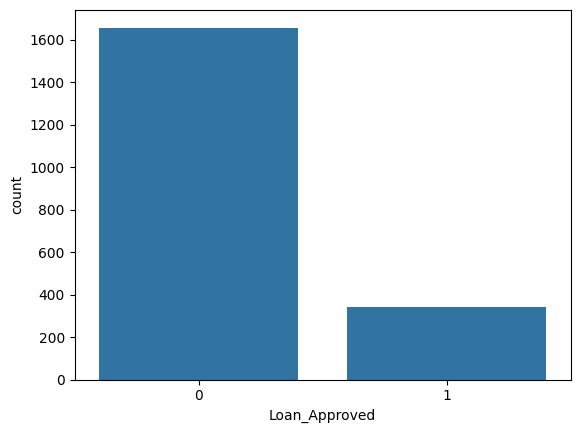

In [4]:
# Distribution of Loan Approval
sns.countplot(x="Loan_Approved", data=df)
plt.show()

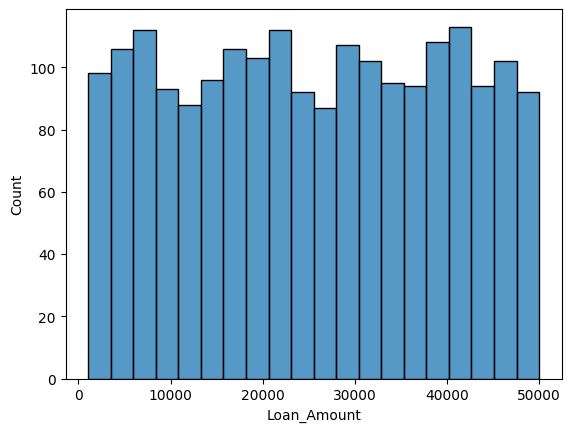

In [5]:
# Loan Amount distribution
sns.histplot(df["Loan_Amount"], bins=20)
plt.show()

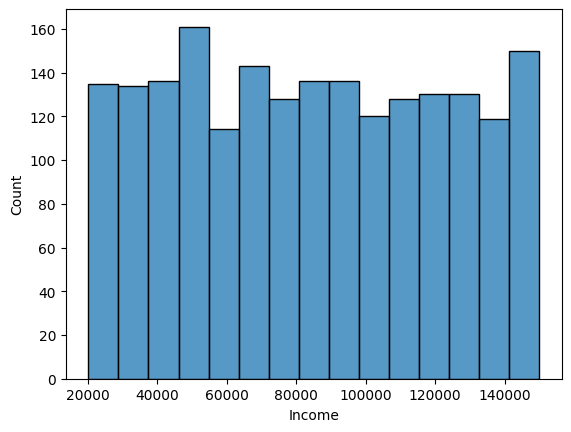

In [6]:
sns.histplot(df["Income"], bins=15)
plt.show()

Credit score is a numerical indicator of an applicant’s creditworthiness and plays a key role in loan approval decisions.

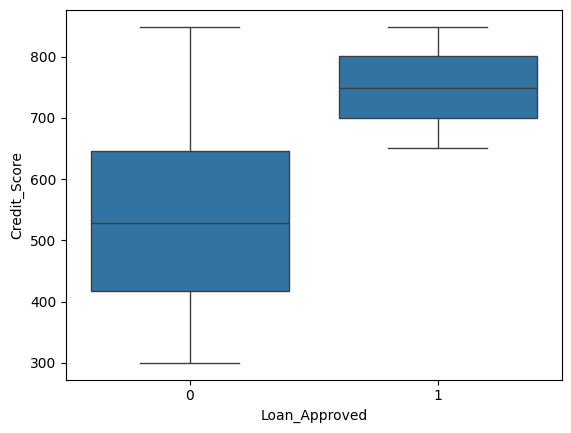

In [7]:
# Credit Score vs Loan Approval
sns.boxplot(x="Loan_Approved", y="Credit_Score", data=df)
plt.show()

#### Train the Model

In [8]:
df["Employment_Status"].value_counts()


Employment_Status
Employed         1260
Unemployed        375
Self-Employed     365
Name: count, dtype: int64

In [9]:
df["Employment_Status"] = df["Employment_Status"].astype(str)
df["Employment_Status"] = (
    df["Employment_Status"]
    .str.strip()
    .str.lower()
    .replace("self-employed", "employed")
    .map({
        "employed": 1,
        "unemployed": 0
    })
)
df.fillna(df.mean(numeric_only=True), inplace=True)

Employment status was converted into numbers so the model could understand and use it for prediction.

In [10]:
# Prepare data for modeling
x = df.drop("Loan_Approved", axis=1)
y = df["Loan_Approved"]

In [11]:
# Split into train & test
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

In [12]:
#find Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

#### Eveluating the Model

In [13]:
# Use the trained model to make predictions on test data
y_pred = model.predict(x_test)

In [14]:
# Check how many predictions were correct overall
accuracy_score(y_test, y_pred)

0.9175

In [15]:
# Show detailed results of correct and incorrect predictions
confusion_matrix(y_test, y_pred)

array([[312,  10],
       [ 23,  55]])

The model correctly rejected 312 applicants and approved 55, while making 10 false approvals and missing 23 eligible customers.

## Conclusion

A Logistic Regression model was built to predict loan approval. The model showed good performance and the confusion matrix helped identify correct and incorrect predictions. This task helped understand basic data preprocessing, classification, and evaluation.